In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
car_train = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv')
car_train.sample(5)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
2069,M17938835z,Skoda Rapid,economy,petrol,3.32,2015,94780,2016,40.69,wheel_shake
720,S-7961176I,VW Polo,economy,petrol,4.98,2012,20532,2018,26.15,engine_overheat
1192,T20813001U,Tesla Model 3,premium,electro,3.98,2017,132784,2017,55.18,engine_fuel
605,I92805218s,Kia Sportage,standart,petrol,4.66,2015,78572,2020,99.69,another_bug
507,p-8676887s,Smart ForFour,economy,petrol,5.54,2015,92117,2019,29.15,break_bug


- `car_id` — идентификатор машины
- `model` / `car_type` / `fuel_type` — марка, класс и тип топлива машины
- `car_rating` / `riders` — общий рейтинг и общее число поездок к концу 2021 года
- `year_to_start` / `year_to_work` — год выпуска машины и год начала работы в автопарке
- `target_reg` — количество дней до поломки
- `target_class` — класс поломки (всего 9 видов)

### Информация про поездки

In [59]:
rides_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv')
rides_info.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
146191,t59184072y,K-9436185H,j1B,2020-01-17,0.10,69,961,47,59.557402,1,3.050668e+03,0,1.281923,-0.834
713542,a14198824D,y-2171969q,x1l,2020-03-16,5.88,84,668,50,85.812580,0,1.885086e+03,0,14.529405,-29.519
179829,c16116098t,M65548078V,J1w,2020-02-16,6.18,12,151,55,63.125428,0,2.352857e+02,0,8.424918,0.250
119232,n17457290j,I-8039148a,a1p,2020-01-23,6.18,11,149,70,81.341039,0,8.531280e+02,0,8.079380,3.919
498794,r91402305G,j-1650243q,I1y,2020-02-28,1.57,27725,277243,41,115.275022,1,1.158893e+06,0,8.095223,-17.742


- `user_id` / `car_id` / `ride_id` — идентификаторы водителя, машины, поездки соответственно
- `ride_date` / `rating` — дата поездки и рейтинг, поставленный водителем
- `ride_duration` / `distance` / `ride_cost` —  длительность (время),  пройденное расстояние, стоимость поездки
- `speed_avg` / `speed_max` — средняя и максимальная скорости поездки соответственно
- `stop_times` / `refueling` — количество остановок (паузы) и флаг: была ли дозаправка
- `user_ride_quality` — оценка манеры вождения водителя машины, определенная скоринговой ML-системой сервиса
- `deviation_normal` — общий показатель датчиков о состоянии машины, относительно эталонных показателей (нормы)

### Информация про водителей

In [60]:
driver_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv')
driver_info.sample(5)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
11285,26,9.2,151,10.0,U74164691q,1,2019-10-7
8310,33,8.0,672,12.0,H77732053h,0,2019-5-20
13216,20,7.8,1180,0.0,D14261565R,1,2019-1-9
6376,42,8.0,241,NaN,J19075793I,0,2019-9-13
10983,23,8.8,1112,13.0,q17749092O,1,2018-10-28


- `user_id` / `age` / `sex` — идентификатор, возраст и пол водителя, соответственно
- `user_rating` — общий рейтинг пользователя за все поездки к концу 2021 года
- `user_rides` — общее количество поездок к концу 2021 года
- `user_time_accident` — число инцидентов (это могли быть аварии/штрафы/эвакуация машины)  
- `first_ride_date` — дата первой поездки

### Информация про ремонт машин

In [61]:
fix_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/fix_info.csv')
fix_info.sample(5)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
118996,F-2165841B,DJ,2019-12-29 18:23,reparking,1.0,30
66621,N-5150907H,NJ,2019-12-11 10:24,repair,6.0,22
109507,L-1924578I,MK,2019-1-6 11:39,reparking,1.0,29
31794,N-1337765t,IT,2020-2-26 7:21,refuel,1.0,24
59169,V-2074579X,KZ,2020-8-4 2:24,reparking,1.0,21


- `worker_id` / `car_id` — идентификатор работника и машины
- `work_type` / `work_duration` — тип и длительность (в часах) проводимой работы
- `destroy_degree` — степень износа/поврежденности машины в случае поломки
- `fix_date` — время начала ремонта (снятия машины с линии)

In [62]:
# Для каждой машины подсчитываем необходимые признаки из базы rides_info - данные о поездках

result_car_id = rides_info.groupby('car_id').agg({
    'rating': ['mean','min'], #минимальный рейтинг за все поездки, средний рейтинг за все поездки - по заданию
    'speed_max': 'max', #максимальная скорость - по заданию
    'user_ride_quality': 'mean', #средняя оценка вождения машины (как стиль вождения)
    'deviation_normal':['min'], #максимальное отклонение от нормы вниз  - покажет интенсивность износа
    'stop_times':'sum', #общее количество остановок  - количество остановок увеличивает износ машины

})

#print(result_car_id)

# Переименовываем столбцы для удобства
result_car_id.columns = ['mean_rating', 'min_rating','max_speed','mean_user_ride_quality', 'min_deviation_normal','total_stops']

# Создаем новый DataFrame с агрегированными данными
new_df_train = pd.DataFrame(result_car_id)


In [63]:
new_df_train.reset_index(inplace=True)

# Присоединяем new_df к rides_info через столбец 'car_id' с помощью метода merge
merged_df_train= car_train.merge(new_df_train, on='car_id', how='left')

merged_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  2337 non-null   object 
 1   model                   2337 non-null   object 
 2   car_type                2337 non-null   object 
 3   fuel_type               2337 non-null   object 
 4   car_rating              2337 non-null   float64
 5   year_to_start           2337 non-null   int64  
 6   riders                  2337 non-null   int64  
 7   year_to_work            2337 non-null   int64  
 8   target_reg              2337 non-null   float64
 9   target_class            2337 non-null   object 
 10  mean_rating             2337 non-null   float64
 11  min_rating              2337 non-null   float64
 12  max_speed               2337 non-null   float64
 13  mean_user_ride_quality  2337 non-null   float64
 14  min_deviation_normal    2337 non-null   

In [64]:
merged_df_2_train = rides_info.merge(driver_info, on='user_id', how='left')
merged_df_2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739500 entries, 0 to 739499
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             739500 non-null  object 
 1   car_id              739500 non-null  object 
 2   ride_id             739500 non-null  object 
 3   ride_date           739500 non-null  object 
 4   rating              739500 non-null  float64
 5   ride_duration       739500 non-null  int64  
 6   ride_cost           739500 non-null  int64  
 7   speed_avg           739500 non-null  int64  
 8   speed_max           736139 non-null  float64
 9   stop_times          739500 non-null  int64  
 10  distance            739500 non-null  float64
 11  refueling           739500 non-null  int64  
 12  user_ride_quality   736872 non-null  float64
 13  deviation_normal    739500 non-null  float64
 14  age                 739500 non-null  int64  
 15  user_rating         739500 non-nul

In [65]:
result_2_train = merged_df_2_train.groupby('car_id').agg({
    'user_id': 'nunique', #количество водителей - может быть признаком знакомства с особенностью машины
    'user_rating':'mean',# средний рейтинг водителей - может быть полезен с точки зрения вероятности поломки
    'age':'mean'  #минимальный, средний и максимальный возраст водителей - может быть важен
})

# Переименовываем столбцы для удобства
result_2_train.columns = ['sum_user_id', 'mean_user_rating', 'mean_age']

# Создаем новый DataFrame с агрегированными данными
new_df_2_train = pd.DataFrame(result_2_train)

In [66]:
new_df_2_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, A-1049127W to z91796444U
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sum_user_id       4250 non-null   int64  
 1   mean_user_rating  4250 non-null   float64
 2   mean_age          4250 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 132.8+ KB


In [67]:
merged_df_3_train = merged_df_train.merge(new_df_2_train, on='car_id', how='left')
merged_df_3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  2337 non-null   object 
 1   model                   2337 non-null   object 
 2   car_type                2337 non-null   object 
 3   fuel_type               2337 non-null   object 
 4   car_rating              2337 non-null   float64
 5   year_to_start           2337 non-null   int64  
 6   riders                  2337 non-null   int64  
 7   year_to_work            2337 non-null   int64  
 8   target_reg              2337 non-null   float64
 9   target_class            2337 non-null   object 
 10  mean_rating             2337 non-null   float64
 11  min_rating              2337 non-null   float64
 12  max_speed               2337 non-null   float64
 13  mean_user_ride_quality  2337 non-null   float64
 14  min_deviation_normal    2337 non-null   

In [68]:
result_3_train = fix_info.groupby('car_id').agg({
    'work_duration':  'max', #длительность простоя в часах: миниммальная, максимальная, средняя
})

# Переименовываем столбцы для удобства
result_3_train.columns = ['max_work_duration']

# Создаем новый DataFrame с агрегированными данными
new_df_3_train = pd.DataFrame(result_3_train)

In [69]:
merged_df_4_train = merged_df_3_train.merge(new_df_3_train, on='car_id', how='left')
merged_df_4_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  2337 non-null   object 
 1   model                   2337 non-null   object 
 2   car_type                2337 non-null   object 
 3   fuel_type               2337 non-null   object 
 4   car_rating              2337 non-null   float64
 5   year_to_start           2337 non-null   int64  
 6   riders                  2337 non-null   int64  
 7   year_to_work            2337 non-null   int64  
 8   target_reg              2337 non-null   float64
 9   target_class            2337 non-null   object 
 10  mean_rating             2337 non-null   float64
 11  min_rating              2337 non-null   float64
 12  max_speed               2337 non-null   float64
 13  mean_user_ride_quality  2337 non-null   float64
 14  min_deviation_normal    2337 non-null   

In [70]:
# Список столбцов, которые нужно удалить
columns_to_drop = ['year_to_start', 'riders', 'year_to_work','target_reg']

# Удаление указанных столбцов
merged_df_5_train = merged_df_4_train.drop(columns=columns_to_drop)

# Сохранение измененного датасета в новый файл
merged_df_5_train.to_csv('merged_df_5_train.csv', index=False)

print("Столбцы успешно удалены и новый датасет сохранен.")

Столбцы успешно удалены и новый датасет сохранен.


In [71]:
merged_df_5_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  2337 non-null   object 
 1   model                   2337 non-null   object 
 2   car_type                2337 non-null   object 
 3   fuel_type               2337 non-null   object 
 4   car_rating              2337 non-null   float64
 5   target_class            2337 non-null   object 
 6   mean_rating             2337 non-null   float64
 7   min_rating              2337 non-null   float64
 8   max_speed               2337 non-null   float64
 9   mean_user_ride_quality  2337 non-null   float64
 10  min_deviation_normal    2337 non-null   float64
 11  total_stops             2337 non-null   int64  
 12  sum_user_id             2337 non-null   int64  
 13  mean_user_rating        2337 non-null   float64
 14  mean_age                2337 non-null   

Создание тестового сета

In [72]:
car_test = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv')
car_test.head(3)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
0,P17494612l,Skoda Rapid,economy,petrol,4.80,2013,42269,2019
1,N-1530212S,Renault Sandero,standart,petrol,4.32,2015,90014,2016
2,B-1154399t,Smart ForTwo,economy,petrol,4.46,2015,82684,2017


In [73]:
# Для каждой машины подсчитываем необходимые признаки из базы rides_info - данные о поездках

result_car_id = rides_info.groupby('car_id').agg({
    'rating': ['mean','min'], #минимальный рейтинг за все поездки, средний рейтинг за все поездки - по заданию
    'speed_max': 'max', #максимальная скорость - по заданию
    'user_ride_quality': 'mean', #средняя оценка вождения машины (как стиль вождения)
    'deviation_normal':['min'], #максимальное отклонение от нормы вниз  - покажет интенсивность износа
    'stop_times':'sum', #общее количество остановок  - количество остановок увеличивает износ машины

})

#print(result_car_id)

# Переименовываем столбцы для удобства
result_car_id.columns = ['mean_rating', 'min_rating','max_speed','mean_user_ride_quality', 'min_deviation_normal','total_stops']

# Создаем новый DataFrame с агрегированными данными
new_df = pd.DataFrame(result_car_id)

In [74]:
new_df.reset_index(inplace=True)

# Присоединяем new_df к rides_info через столбец 'car_id' с помощью метода merge
merged_df = car_test.merge(new_df, on='car_id', how='left')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  1913 non-null   object 
 1   model                   1913 non-null   object 
 2   car_type                1913 non-null   object 
 3   fuel_type               1913 non-null   object 
 4   car_rating              1913 non-null   float64
 5   year_to_start           1913 non-null   int64  
 6   riders                  1913 non-null   int64  
 7   year_to_work            1913 non-null   int64  
 8   mean_rating             1913 non-null   float64
 9   min_rating              1913 non-null   float64
 10  max_speed               1913 non-null   float64
 11  mean_user_ride_quality  1913 non-null   float64
 12  min_deviation_normal    1913 non-null   float64
 13  total_stops             1913 non-null   int64  
dtypes: float64(6), int64(4), object(4)
memor

In [75]:
merged_df_2 = rides_info.merge(driver_info, on='user_id', how='left')
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739500 entries, 0 to 739499
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             739500 non-null  object 
 1   car_id              739500 non-null  object 
 2   ride_id             739500 non-null  object 
 3   ride_date           739500 non-null  object 
 4   rating              739500 non-null  float64
 5   ride_duration       739500 non-null  int64  
 6   ride_cost           739500 non-null  int64  
 7   speed_avg           739500 non-null  int64  
 8   speed_max           736139 non-null  float64
 9   stop_times          739500 non-null  int64  
 10  distance            739500 non-null  float64
 11  refueling           739500 non-null  int64  
 12  user_ride_quality   736872 non-null  float64
 13  deviation_normal    739500 non-null  float64
 14  age                 739500 non-null  int64  
 15  user_rating         739500 non-nul

In [76]:
result_2 = merged_df_2.groupby('car_id').agg({
    'user_id': 'nunique', #количество водителей - может быть признаком знакомства с особенностью машины
    'user_rating':'mean',# средний рейтинг водителей - может быть полезен с точки зрения вероятности поломки
    'age':'mean'  #минимальный, средний и максимальный возраст водителей - может быть важен
})

# Переименовываем столбцы для удобства
result_2.columns = ['sum_user_id', 'mean_user_rating', 'mean_age']

# Создаем новый DataFrame с агрегированными данными
new_df_2 = pd.DataFrame(result_2)

In [77]:
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, A-1049127W to z91796444U
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sum_user_id       4250 non-null   int64  
 1   mean_user_rating  4250 non-null   float64
 2   mean_age          4250 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 132.8+ KB


In [78]:
merged_df_3 = merged_df.merge(new_df_2, on='car_id', how='left')
merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  1913 non-null   object 
 1   model                   1913 non-null   object 
 2   car_type                1913 non-null   object 
 3   fuel_type               1913 non-null   object 
 4   car_rating              1913 non-null   float64
 5   year_to_start           1913 non-null   int64  
 6   riders                  1913 non-null   int64  
 7   year_to_work            1913 non-null   int64  
 8   mean_rating             1913 non-null   float64
 9   min_rating              1913 non-null   float64
 10  max_speed               1913 non-null   float64
 11  mean_user_ride_quality  1913 non-null   float64
 12  min_deviation_normal    1913 non-null   float64
 13  total_stops             1913 non-null   int64  
 14  sum_user_id             1913 non-null   

In [79]:
result_3 = fix_info.groupby('car_id').agg({
    'work_duration':  'max', #длительность простоя в часах: миниммальная, максимальная, средняя
})

# Переименовываем столбцы для удобства
result_3.columns = ['max_work_duration']

# Создаем новый DataFrame с агрегированными данными
new_df_3 = pd.DataFrame(result_3)

In [80]:
merged_df_4 = merged_df_3.merge(new_df_3, on='car_id', how='left')
merged_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  1913 non-null   object 
 1   model                   1913 non-null   object 
 2   car_type                1913 non-null   object 
 3   fuel_type               1913 non-null   object 
 4   car_rating              1913 non-null   float64
 5   year_to_start           1913 non-null   int64  
 6   riders                  1913 non-null   int64  
 7   year_to_work            1913 non-null   int64  
 8   mean_rating             1913 non-null   float64
 9   min_rating              1913 non-null   float64
 10  max_speed               1913 non-null   float64
 11  mean_user_ride_quality  1913 non-null   float64
 12  min_deviation_normal    1913 non-null   float64
 13  total_stops             1913 non-null   int64  
 14  sum_user_id             1913 non-null   

In [81]:
# Список столбцов, которые нужно удалить
columns_to_drop = ['year_to_start', 'riders', 'year_to_work']

# Удаление указанных столбцов
merged_df_5_test = merged_df_4.drop(columns=columns_to_drop)

# Сохранение измененного датасета в новый файл
merged_df_5_test.to_csv('merged_df_5_test.csv', index=False)

print("Столбцы успешно удалены и новый датасет сохранен.")

Столбцы успешно удалены и новый датасет сохранен.


In [82]:
merged_df_5_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  1913 non-null   object 
 1   model                   1913 non-null   object 
 2   car_type                1913 non-null   object 
 3   fuel_type               1913 non-null   object 
 4   car_rating              1913 non-null   float64
 5   mean_rating             1913 non-null   float64
 6   min_rating              1913 non-null   float64
 7   max_speed               1913 non-null   float64
 8   mean_user_ride_quality  1913 non-null   float64
 9   min_deviation_normal    1913 non-null   float64
 10  total_stops             1913 non-null   int64  
 11  sum_user_id             1913 non-null   int64  
 12  mean_user_rating        1913 non-null   float64
 13  mean_age                1913 non-null   float64
 14  max_work_duration       1913 non-null   

In [83]:
cat_cols = ["model", "car_type", "fuel_type"]
for col in cat_cols:
    merged_df_5_test[col] = merged_df_5_test[col].replace(np.unique(merged_df_5_test[col]), np.arange(merged_df_5_test[col].nunique())).astype(int)
merged_df_5_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  1913 non-null   object 
 1   model                   1913 non-null   int64  
 2   car_type                1913 non-null   int64  
 3   fuel_type               1913 non-null   int64  
 4   car_rating              1913 non-null   float64
 5   mean_rating             1913 non-null   float64
 6   min_rating              1913 non-null   float64
 7   max_speed               1913 non-null   float64
 8   mean_user_ride_quality  1913 non-null   float64
 9   min_deviation_normal    1913 non-null   float64
 10  total_stops             1913 non-null   int64  
 11  sum_user_id             1913 non-null   int64  
 12  mean_user_rating        1913 non-null   float64
 13  mean_age                1913 non-null   float64
 14  max_work_duration       1913 non-null   

In [84]:
merged_df_5_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  2337 non-null   object 
 1   model                   2337 non-null   object 
 2   car_type                2337 non-null   object 
 3   fuel_type               2337 non-null   object 
 4   car_rating              2337 non-null   float64
 5   target_class            2337 non-null   object 
 6   mean_rating             2337 non-null   float64
 7   min_rating              2337 non-null   float64
 8   max_speed               2337 non-null   float64
 9   mean_user_ride_quality  2337 non-null   float64
 10  min_deviation_normal    2337 non-null   float64
 11  total_stops             2337 non-null   int64  
 12  sum_user_id             2337 non-null   int64  
 13  mean_user_rating        2337 non-null   float64
 14  mean_age                2337 non-null   

In [86]:
cat_cols = ["model", "car_type", "fuel_type"]
for col in cat_cols:
    merged_df_5_train[col] = merged_df_5_train[col].replace(np.unique(merged_df_5_train[col]), np.arange(merged_df_5_train[col].nunique())).astype(int)
merged_df_5_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  2337 non-null   object 
 1   model                   2337 non-null   int64  
 2   car_type                2337 non-null   int64  
 3   fuel_type               2337 non-null   int64  
 4   car_rating              2337 non-null   float64
 5   target_class            2337 non-null   object 
 6   mean_rating             2337 non-null   float64
 7   min_rating              2337 non-null   float64
 8   max_speed               2337 non-null   float64
 9   mean_user_ride_quality  2337 non-null   float64
 10  min_deviation_normal    2337 non-null   float64
 11  total_stops             2337 non-null   int64  
 12  sum_user_id             2337 non-null   int64  
 13  mean_user_rating        2337 non-null   float64
 14  mean_age                2337 non-null   



---



---



Тренируем модель

In [90]:
merged_df_5_train

,car_id,model,car_type,fuel_type,car_rating,target_class,mean_rating,min_rating,max_speed,mean_user_ride_quality,min_deviation_normal,total_stops,sum_user_id,mean_user_rating,mean_age,max_work_duration
0,y13744087j,8,1,1,3.78,another_bug,4.737759,0.10,180.855726,-0.901190,-9.000,630,170,8.229885,33.511494,56
1,O41613818T,23,1,1,3.90,electro_bug,4.480517,0.00,187.862734,14.018105,-25.088,145,174,7.988506,34.988506,48
2,d-2109686j,16,3,1,6.30,gear_stick,4.768391,0.10,102.382857,0.722771,-12.400,140,173,7.843103,32.839080,59
3,u29695600e,12,0,1,4.04,engine_fuel,3.880920,0.10,172.793237,-4.290370,-12.691,150,170,8.524138,34.977011,64
4,N-8915870N,16,3,1,4.70,engine_fuel,4.181149,0.10,203.462289,-13.465342,-20.907,132,171,8.112069,34.298851,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,j21246192N,19,1,1,4.38,wheel_shake,4.608908,0.10,141.502350,-5.722741,-10.842,509,171,8.124138,32.632184,71
2333,h-1554287F,1,2,1,4.30,engine_check,4.683793,0.10,155.000000,-8.048019,-49.851,134,169,8.150575,34.977011,63
2334,A15262612g,6,1,1,3.88,gear_stick,4.655345,0.10,104.180940,-0.251597,-65.503,144,172,7.783908,33.287356,44
2335,W-2514493U,16,3,1,4.50,another_bug,4.638333,0.10,200.000000,0.424606,-25.038,609,171,8.084483,31.977011,64


In [91]:
X = merged_df_5_train.drop(['car_id', 'target_class'], axis=1)
y = merged_df_5_train['target_class'] #предсказание класса поломки - задача классификации

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   2337 non-null   int64  
 1   car_type                2337 non-null   int64  
 2   fuel_type               2337 non-null   int64  
 3   car_rating              2337 non-null   float64
 4   mean_rating             2337 non-null   float64
 5   min_rating              2337 non-null   float64
 6   max_speed               2337 non-null   float64
 7   mean_user_ride_quality  2337 non-null   float64
 8   min_deviation_normal    2337 non-null   float64
 9   total_stops             2337 non-null   int64  
 10  sum_user_id             2337 non-null   int64  
 11  mean_user_rating        2337 non-null   float64
 12  mean_age                2337 non-null   float64
 13  max_work_duration       2337 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 25

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

CatBoostClassifier модель

In [98]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.0 MB/s eta 0:00:00


In [99]:
from catboost import CatBoostClassifier

In [102]:
from sklearn.metrics import accuracy_score

In [123]:
# Создаем модель CatBoostClassifier с заданными параметрами
cat_model = CatBoostClassifier(random_state=42,
                           thread_count=-1,
                           depth=8,
                           bootstrap_type='Bayesian',
                           l2_leaf_reg=0.01)

cat_model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=100,
          plot=False,
          use_best_model=True,
          early_stopping_rounds=100)

0:	learn: 2.0087822	test: 2.0185509	best: 2.0185509 (0)	total: 139ms	remaining: 2m 18s
100:	learn: 0.1400077	test: 0.2490556	best: 0.2490556 (100)	total: 10.9s	remaining: 1m 36s
200:	learn: 0.0477706	test: 0.1908343	best: 0.1908343 (200)	total: 17.7s	remaining: 1m 10s
300:	learn: 0.0195185	test: 0.1836110	best: 0.1831871 (265)	total: 28.8s	remaining: 1m 6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1831871263
bestIteration = 265

Shrink model to first 266 iterations.


In [124]:
predictions =cat_model.predict(X_test) #предсказания модели на тестовых данных

accuracy = accuracy_score(y_test, predictions) #вычисление точности

print(f'Accuracy: {accuracy}' )

Accuracy: 0.9387464387464387


In [125]:
submit = pd.DataFrame({"target": cat_model.predict(X_test).reshape(-1)})
submit.to_csv("/content/catboost_info/catboost_preds.csv", index=False)
submit.head()

,target
0,engine_fuel
1,electro_bug
2,engine_overheat
3,engine_ignition
4,engine_ignition


# RandomForestClassifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'random_state': 42
}

rf_model = RandomForestClassifier(**params_rf)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', random_state=42)

In [118]:
predictions_4 =rf_model.predict(X_test) #предсказания модели на тестовых данных

accuracy_4 = accuracy_score(y_test, predictions_4) #вычисление точности

print(f'Accuracy: {accuracy_4}' )

Accuracy: 0.9330484330484331


In [119]:
submit = pd.DataFrame({"target": rf_model.predict(X_test).reshape(-1)})
submit.to_csv("/content/catboost_info/rf_model.csv", index=False)
submit.head()

,target
0,engine_fuel
1,electro_bug
2,engine_overheat
3,engine_ignition
4,engine_ignition


In [121]:
from sklearn.ensemble import VotingClassifier

In [129]:
# Создаем новый голосующий классификатор с обновленными данными
models = [('cat_model', cat_model), ('rf_model', rf_model)]
voting = VotingClassifier(estimators=models, voting='soft')

# Обучаем голосующий классификатор на обновленных данных
voting.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_preds = voting.predict_proba(X_test)[:, 1]

0:	learn: 2.0087822	total: 124ms	remaining: 2m 4s
1:	learn: 1.8655950	total: 238ms	remaining: 1m 58s
2:	learn: 1.7449823	total: 373ms	remaining: 2m 3s
3:	learn: 1.6345329	total: 486ms	remaining: 2m 1s
4:	learn: 1.5439870	total: 612ms	remaining: 2m 1s
5:	learn: 1.4598415	total: 729ms	remaining: 2m
6:	learn: 1.3872014	total: 878ms	remaining: 2m 4s
7:	learn: 1.3177392	total: 1.01s	remaining: 2m 5s
8:	learn: 1.2575624	total: 1.14s	remaining: 2m 5s
9:	learn: 1.2020690	total: 1.27s	remaining: 2m 5s
10:	learn: 1.1510890	total: 1.4s	remaining: 2m 6s
11:	learn: 1.1039138	total: 1.53s	remaining: 2m 5s
12:	learn: 1.0603239	total: 1.66s	remaining: 2m 6s
13:	learn: 1.0183165	total: 1.79s	remaining: 2m 6s
14:	learn: 0.9792349	total: 1.93s	remaining: 2m 7s
15:	learn: 0.9412915	total: 2.06s	remaining: 2m 6s
16:	learn: 0.9050354	total: 2.2s	remaining: 2m 7s
17:	learn: 0.8729049	total: 2.34s	remaining: 2m 7s
18:	learn: 0.8427627	total: 2.46s	remaining: 2m 7s
19:	learn: 0.8146021	total: 2.59s	remaining: 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [130]:
from sklearn.metrics import accuracy_score

# Вычисляем точность (accuracy) для многоклассовой классификации
accuracy = accuracy_score(y_test, y_test)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [132]:
import pickle

# Сохраняем модель
with open('voting_model.pkl', 'wb') as file:
    pickle.dump(voting, file)

# Загружаем модель из файла
with open('voting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [131]:
merged_df_5_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  1913 non-null   object 
 1   model                   1913 non-null   int64  
 2   car_type                1913 non-null   int64  
 3   fuel_type               1913 non-null   int64  
 4   car_rating              1913 non-null   float64
 5   mean_rating             1913 non-null   float64
 6   min_rating              1913 non-null   float64
 7   max_speed               1913 non-null   float64
 8   mean_user_ride_quality  1913 non-null   float64
 9   min_deviation_normal    1913 non-null   float64
 10  total_stops             1913 non-null   int64  
 11  sum_user_id             1913 non-null   int64  
 12  mean_user_rating        1913 non-null   float64
 13  mean_age                1913 non-null   float64
 14  max_work_duration       1913 non-null   

In [135]:
# Получение признаков для предсказаний
X_test = merged_df_5_test.drop(columns=['car_id'])

# Загрузка натренированной модели
import joblib

loaded_model = joblib.load('voting_model.pkl')  # Загружаем сохраненную модель

# Предсказания с использованием загруженной модели
predictions = loaded_model.predict(X_test)

# Создание DataFrame с предсказаниями
submission_df = pd.DataFrame({
    'car_id': merged_df_5_test['car_id'],  # Предположим, что у вас есть столбец 'ID' в тестовом наборе
    'target_class': predictions
})

# Сохранение предсказаний в CSV файл
submission_df.to_csv('submission.csv', index=False)


In [136]:
submission_df.head()

,target_class
0,engine_overheat
1,electro_bug
2,break_bug
3,gear_stick
4,electro_bug


In [137]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target_class  1913 non-null   object
dtypes: object(1)
memory usage: 15.1+ KB


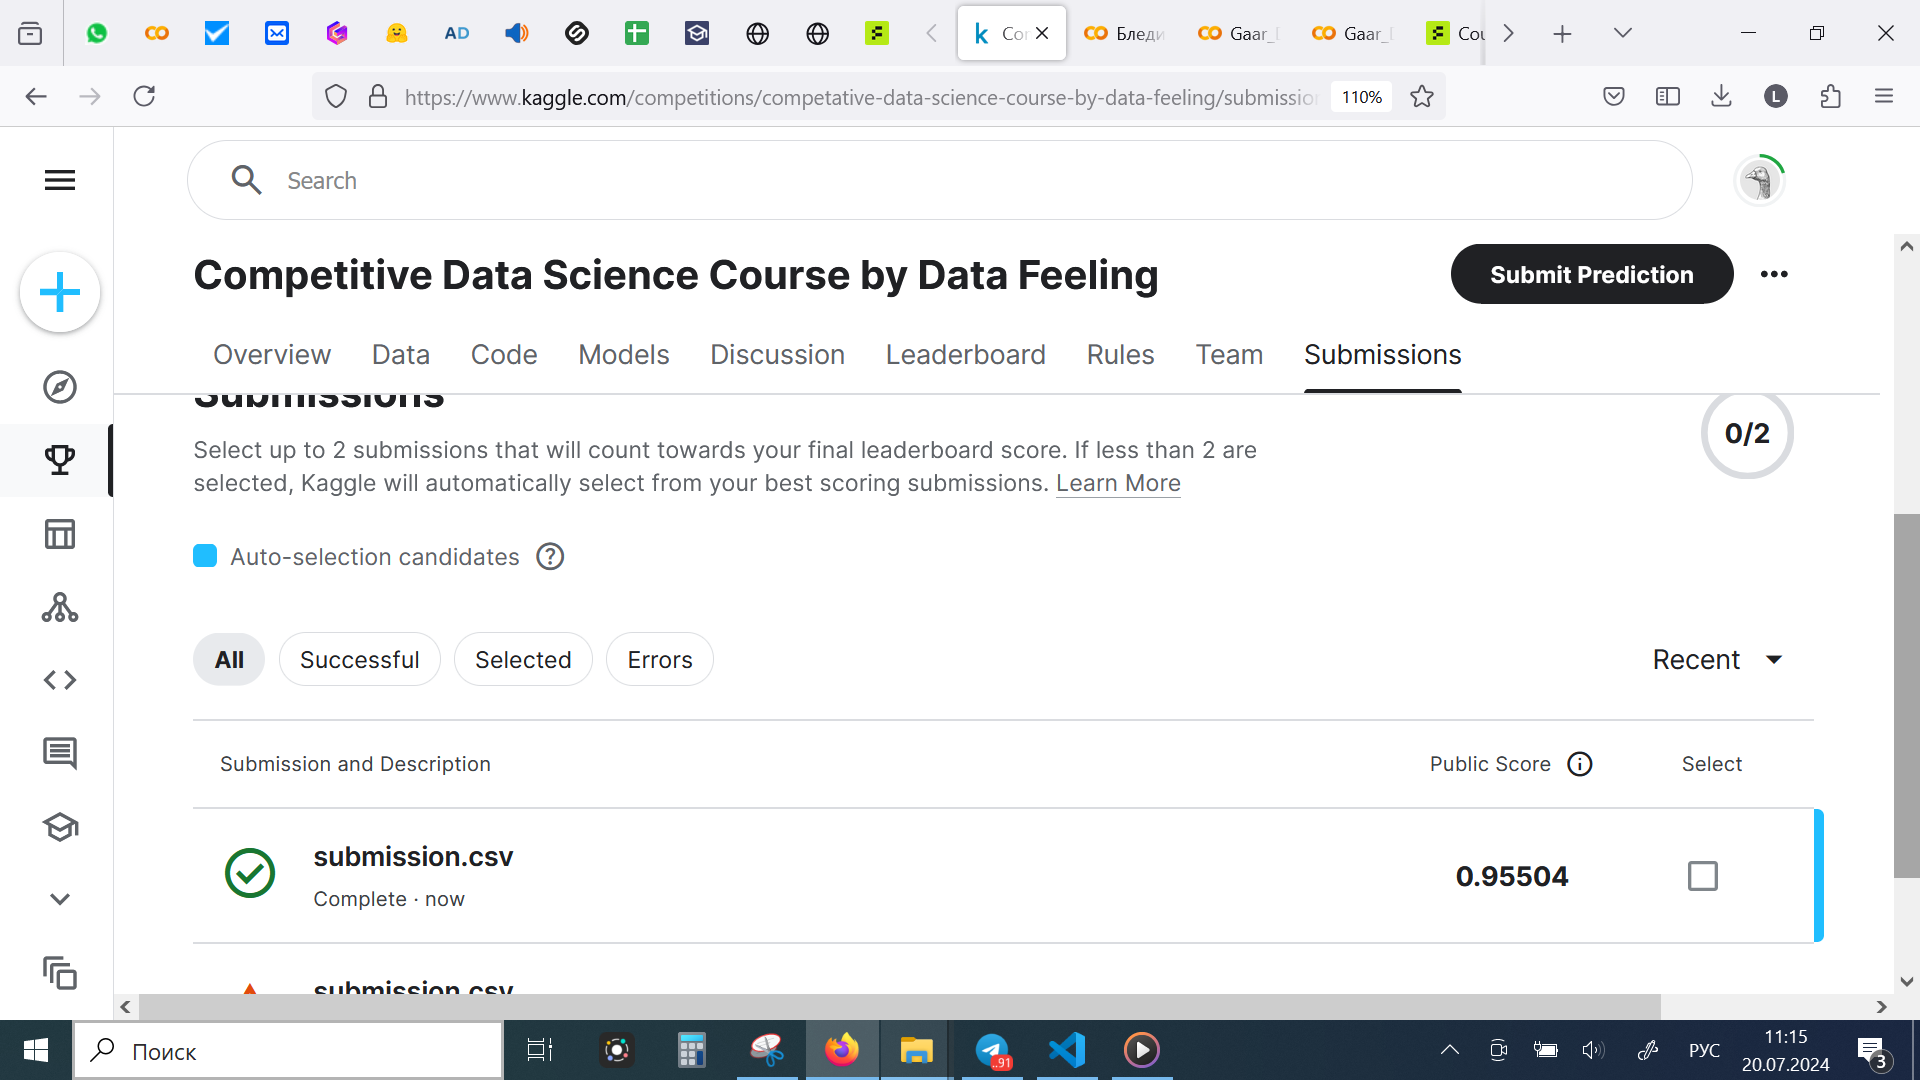

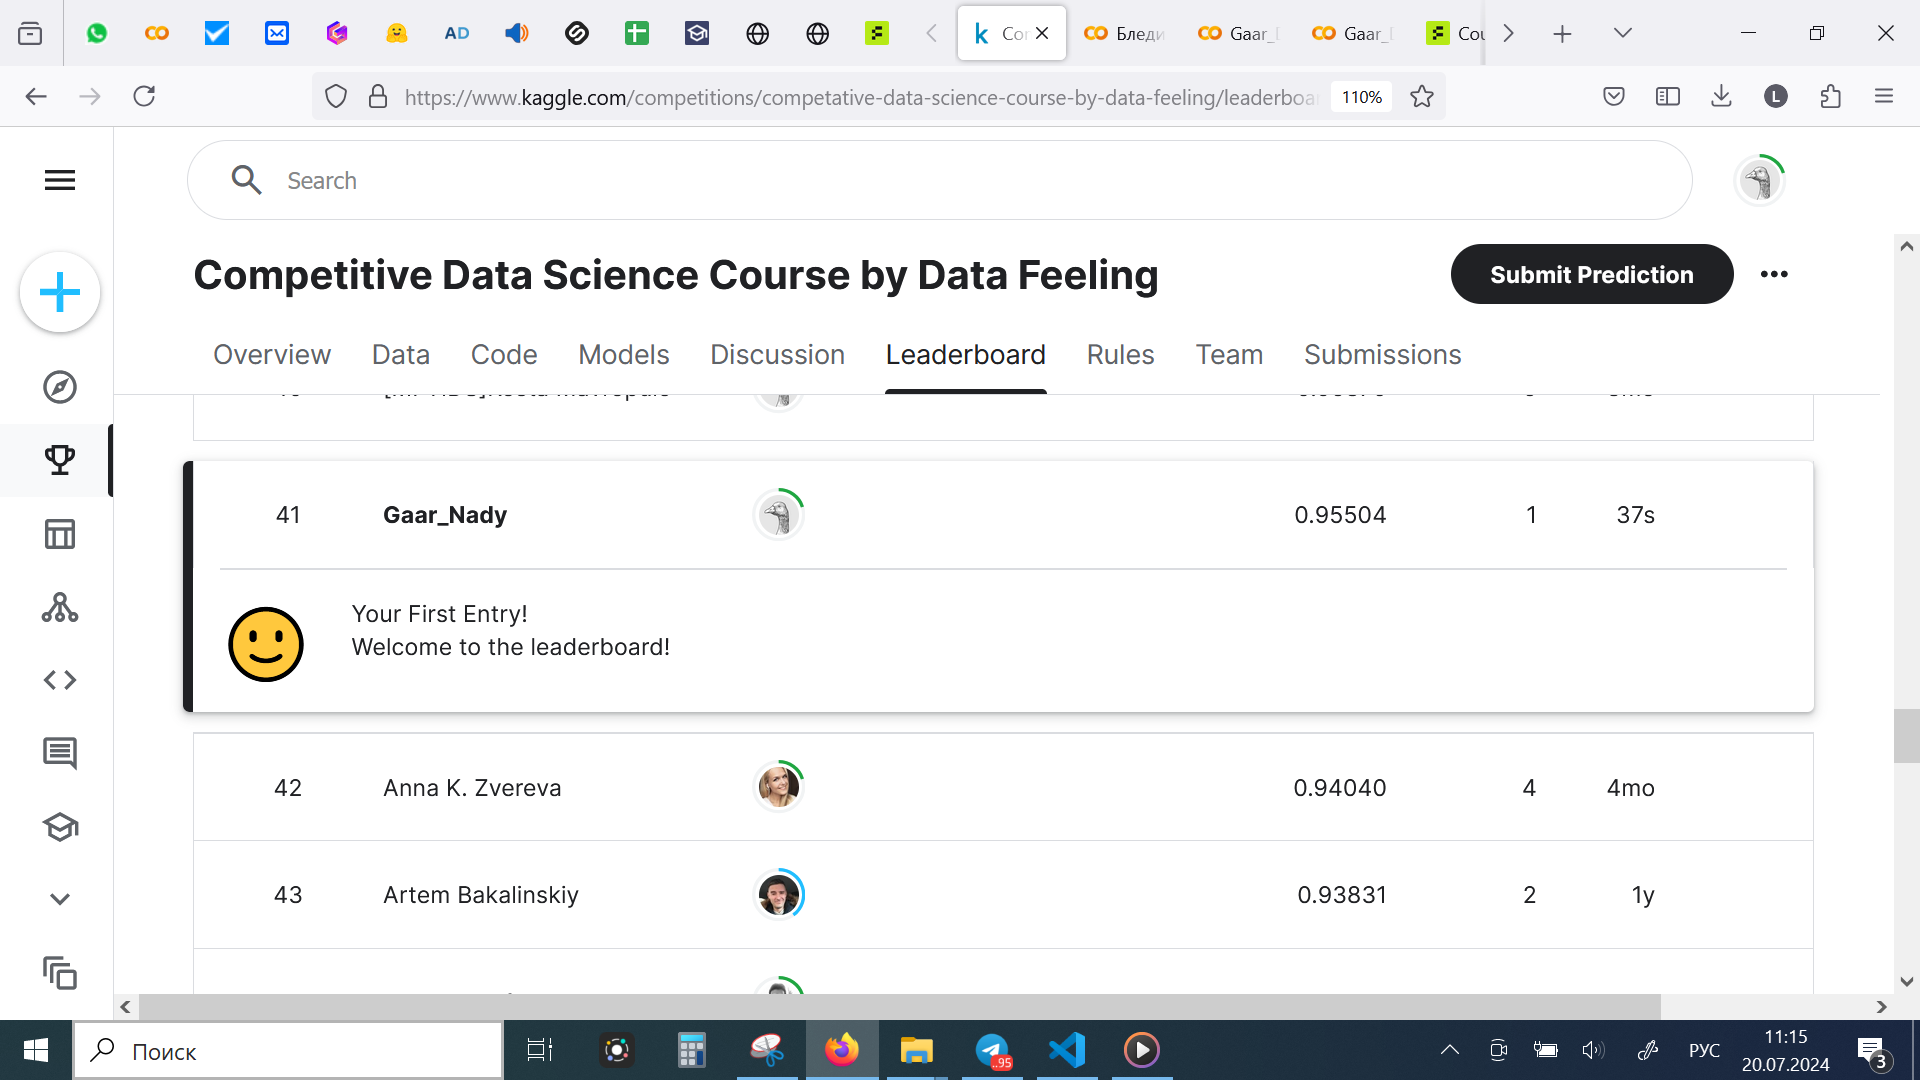